#### Project: Detection of Parkinson's Disease using Machine Learning

#### Dataset
195 voice samples (also called phonations) collected from 31 individuals. Among these: (24 columns)
23 were diagnosed with Parkinson’s Disease (PD).
8 were healthy controls.
#### Introduction
Parkinson's Disease (PD) is a chronic and progressive movement disorder. Early diagnosis is critical for effective treatment and management. This project applies supervised learning techniques to predict PD based on extracted features from voice recordings.

## Import Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import tensorflow as tf
import random
import os
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [52]:
# Loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv("C:\\Users\\khadeeja\\Desktop\\Sem 2\\Machine Learning\\Project\\parkinsons.csv")

In [53]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [54]:
# Number of rows and columns in the DataFrame
parkinsons_data.shape

(195, 24)

In [55]:
# Getting more information
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [56]:
# Checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [57]:
# Getting some statistical measures abouth the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


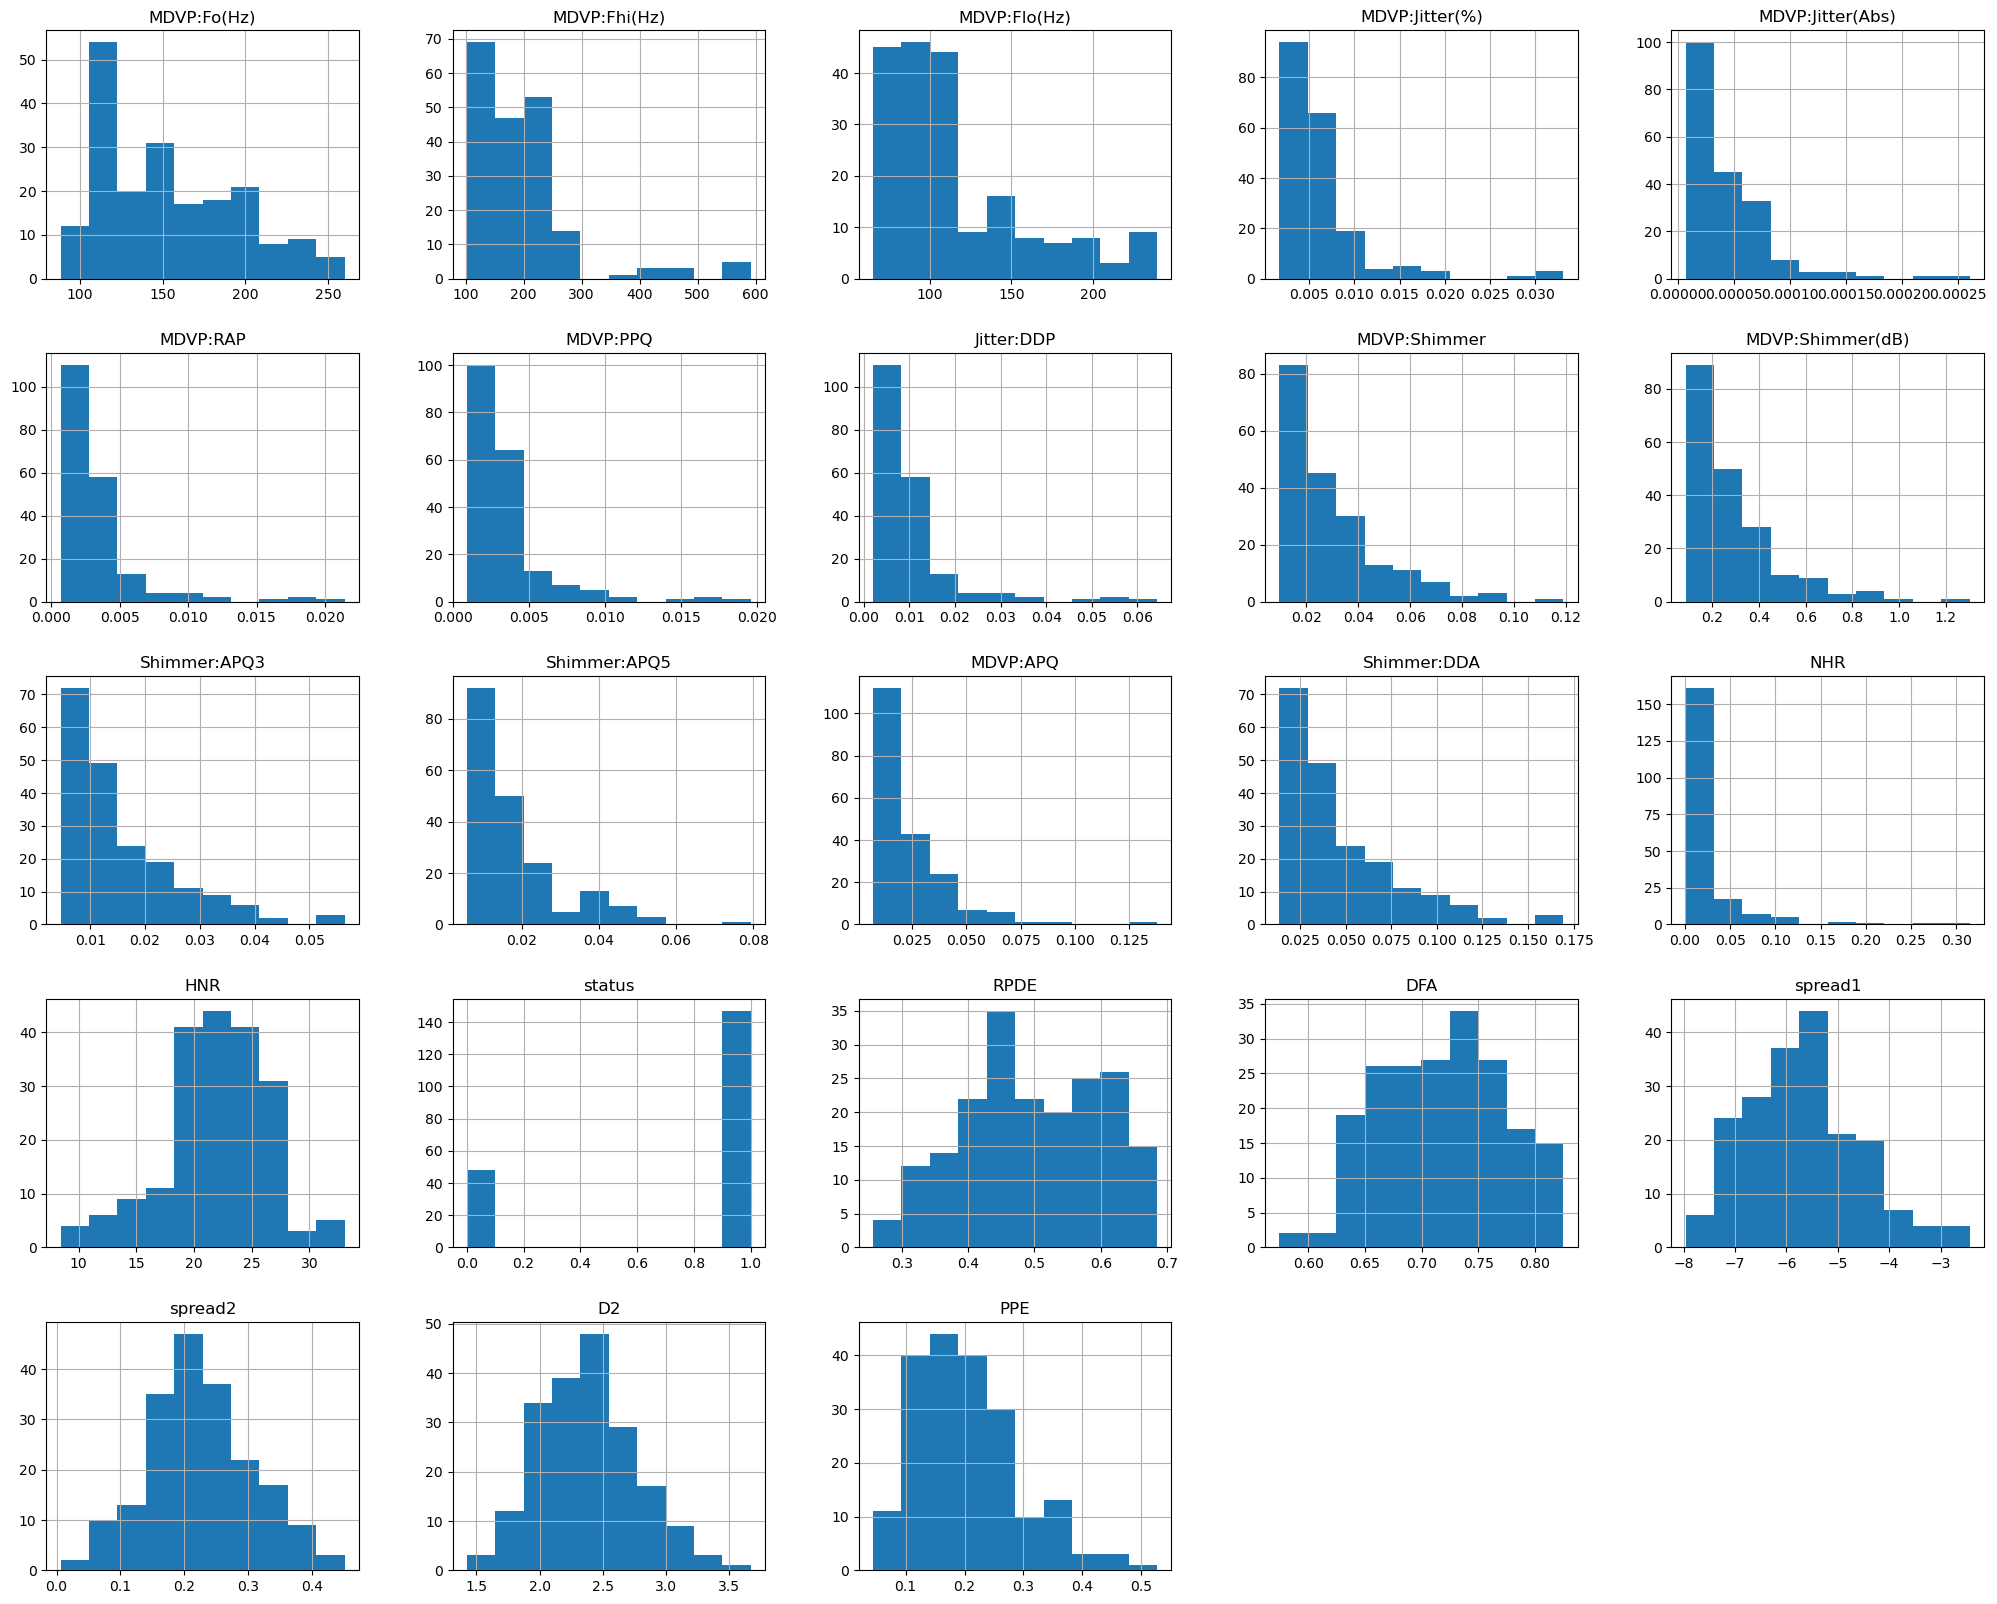

In [58]:
parkinsons_data.hist(figsize=(25,20));

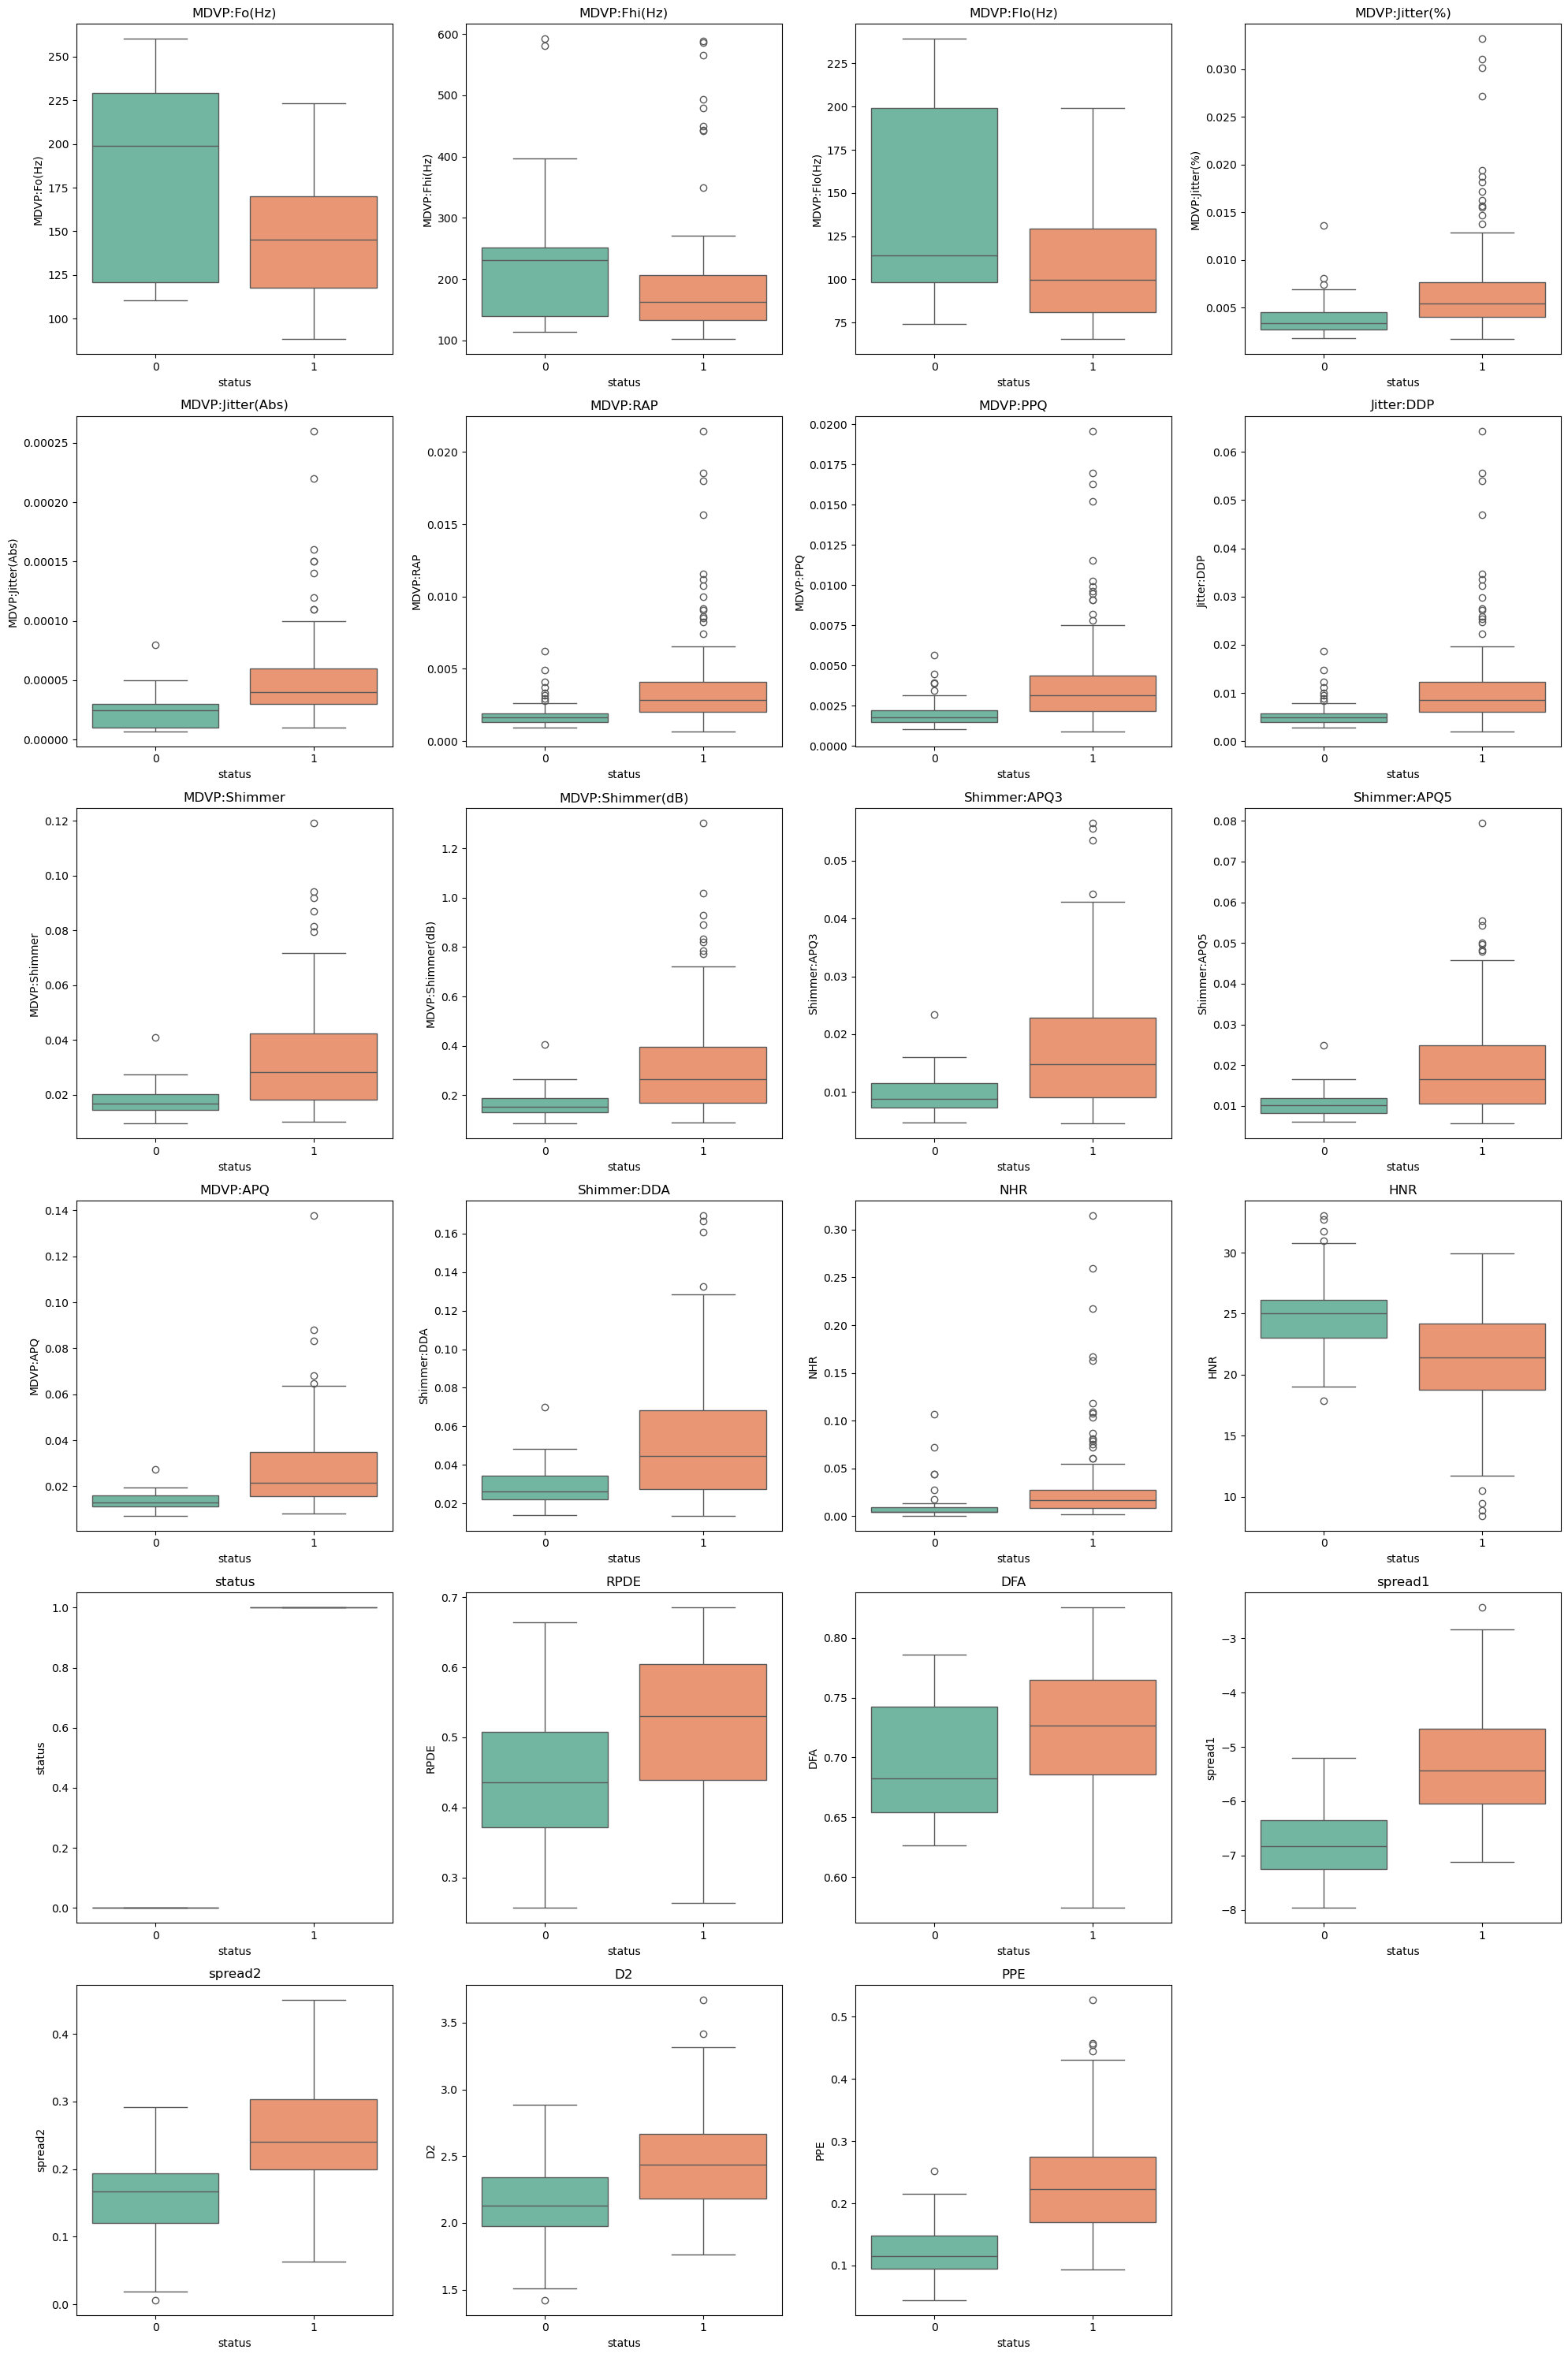

In [59]:
plt.figure(figsize=(20, 5*((len(parkinsons_data.columns)-1)//4 + 1)))
for i, col in enumerate(parkinsons_data.columns.drop('name'), 1):
    plt.subplot((len(parkinsons_data.columns)-1)//4 + 1, 4, i)
    sns.boxplot(x='status', y=col, hue='status', data=parkinsons_data,
                palette=['#66c2a5','#fc8d62'], legend=False)
    plt.title(col)
plt.tight_layout()
plt.show()

In [60]:
# Distribution of target variable or the distribution of Parkinson's
parkinsons_data["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

######  1 -> Parkinson's Positive
######  0 -> Healthy
###### *Here we can clearly see the data is very imbalanced, we will work on this in further part.*

In [62]:
# Grouping the data based on the target variable
parkinsons_data.groupby("status").mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## Data Pre-Processing

In [64]:
# Separating the features & Target
X = parkinsons_data.drop(columns=["name","status"],axis=1) # to drop the column axis=1 and while dropping row axis=0
Y = parkinsons_data["status"]
Z = parkinsons_data.drop(["name"],axis=1)

In [65]:
correl = X.corr()
correl

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


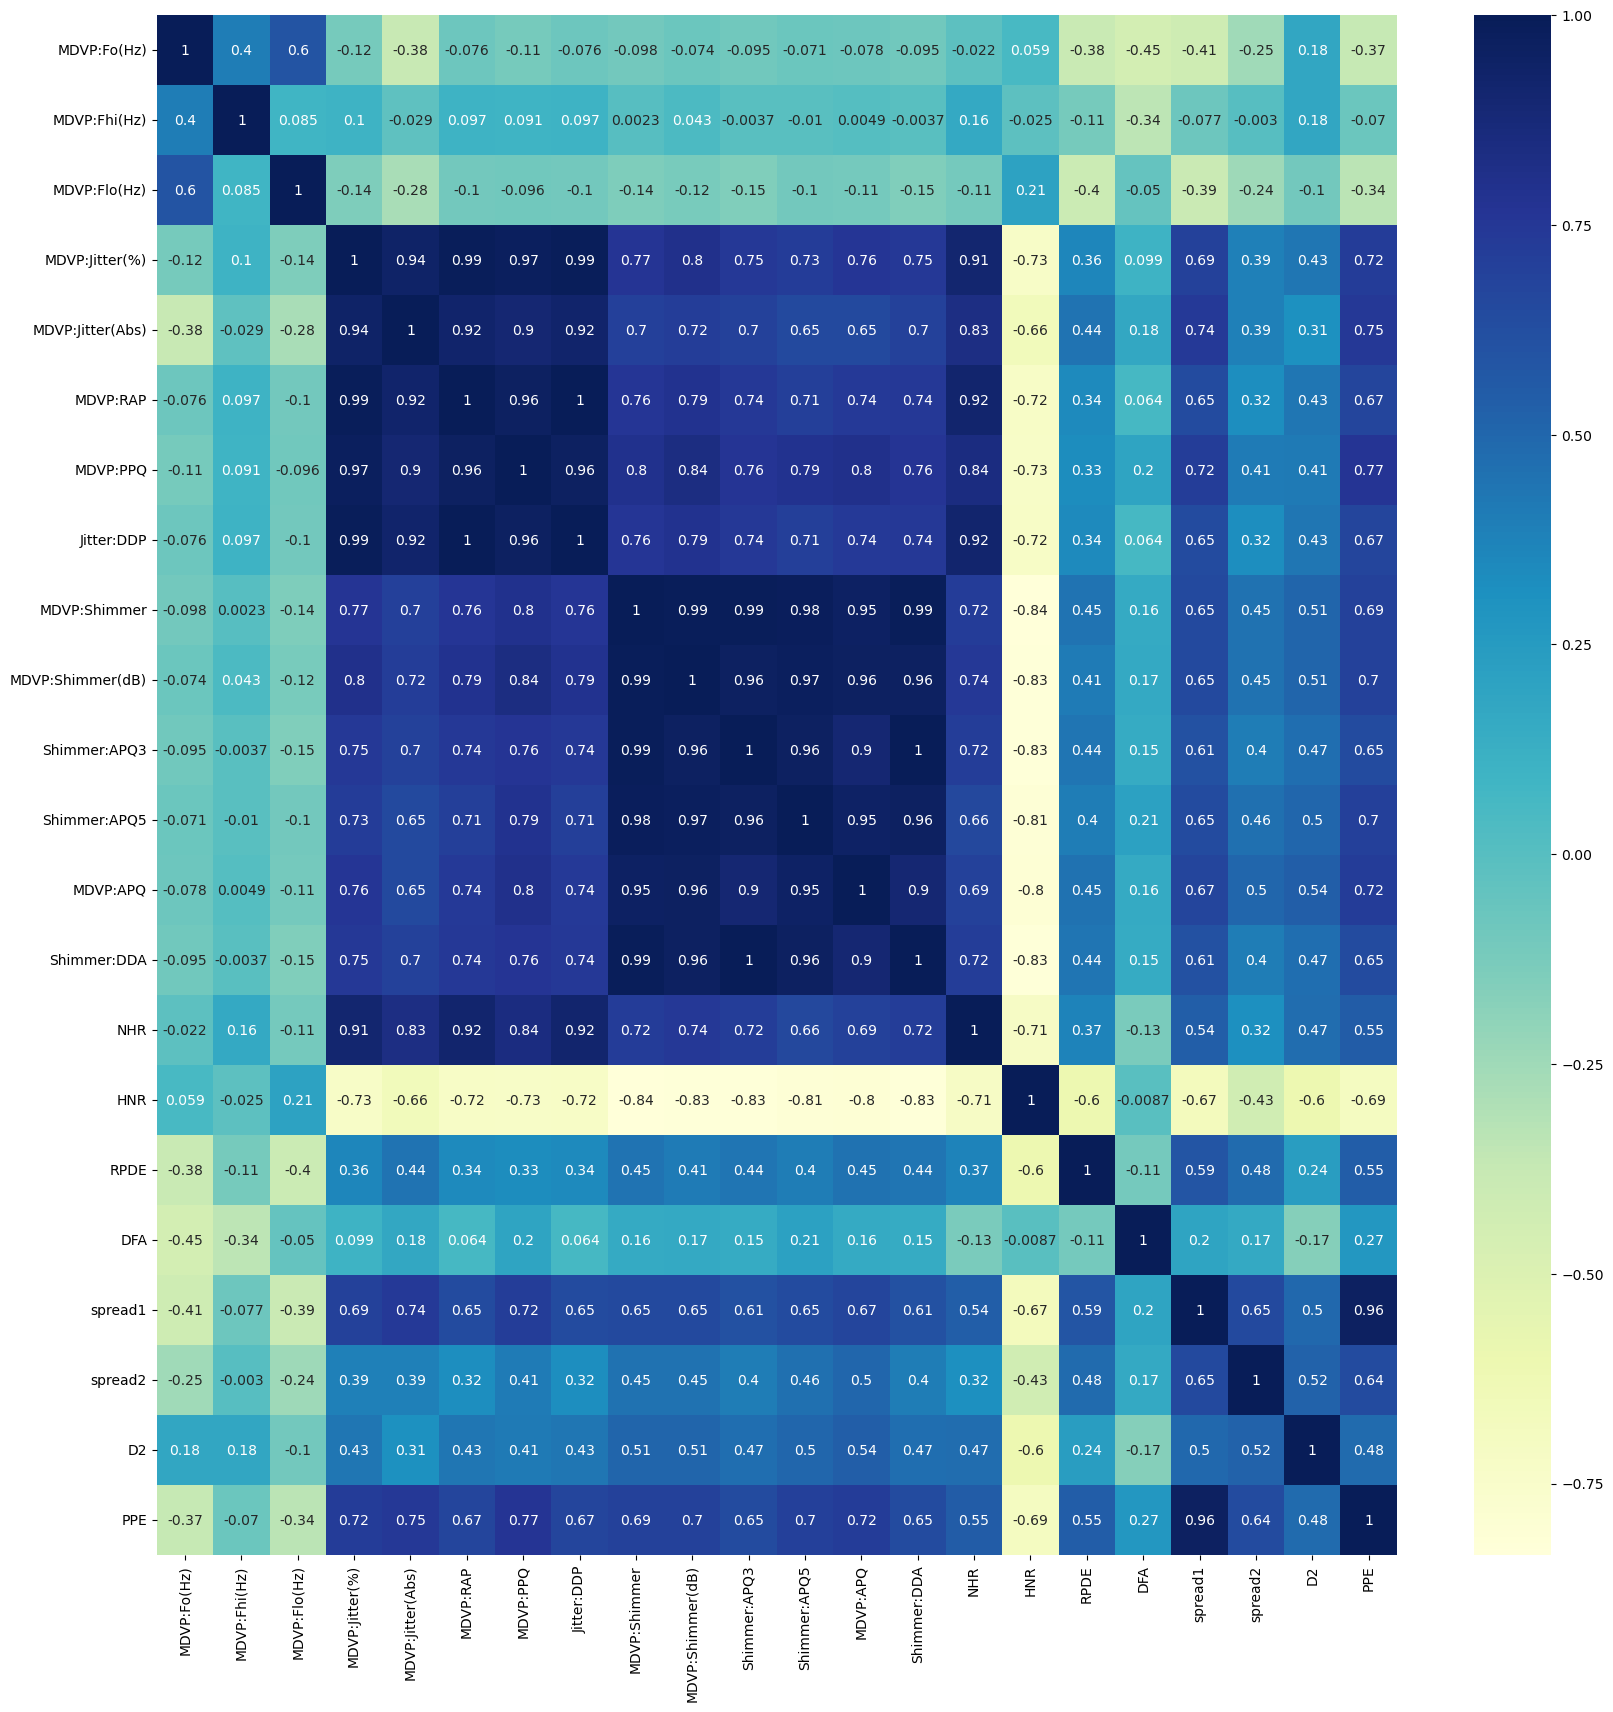

In [66]:
# Heatmap without status column
plt.figure(figsize=(20,20))
# plt.figure() is a funct of matplotlib that creates a new blank fig,avoid overlapping.
sns.heatmap(correl,annot=True,cmap='YlGnBu')
#annot=T writes the actual corr number in each box,cmap="OrRd"sets the color theme to Orange-Red
plt.show()
#plt.show() displays the plot on the screen

In [67]:
correl_with_status=Z.corr()
correl_with_status

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


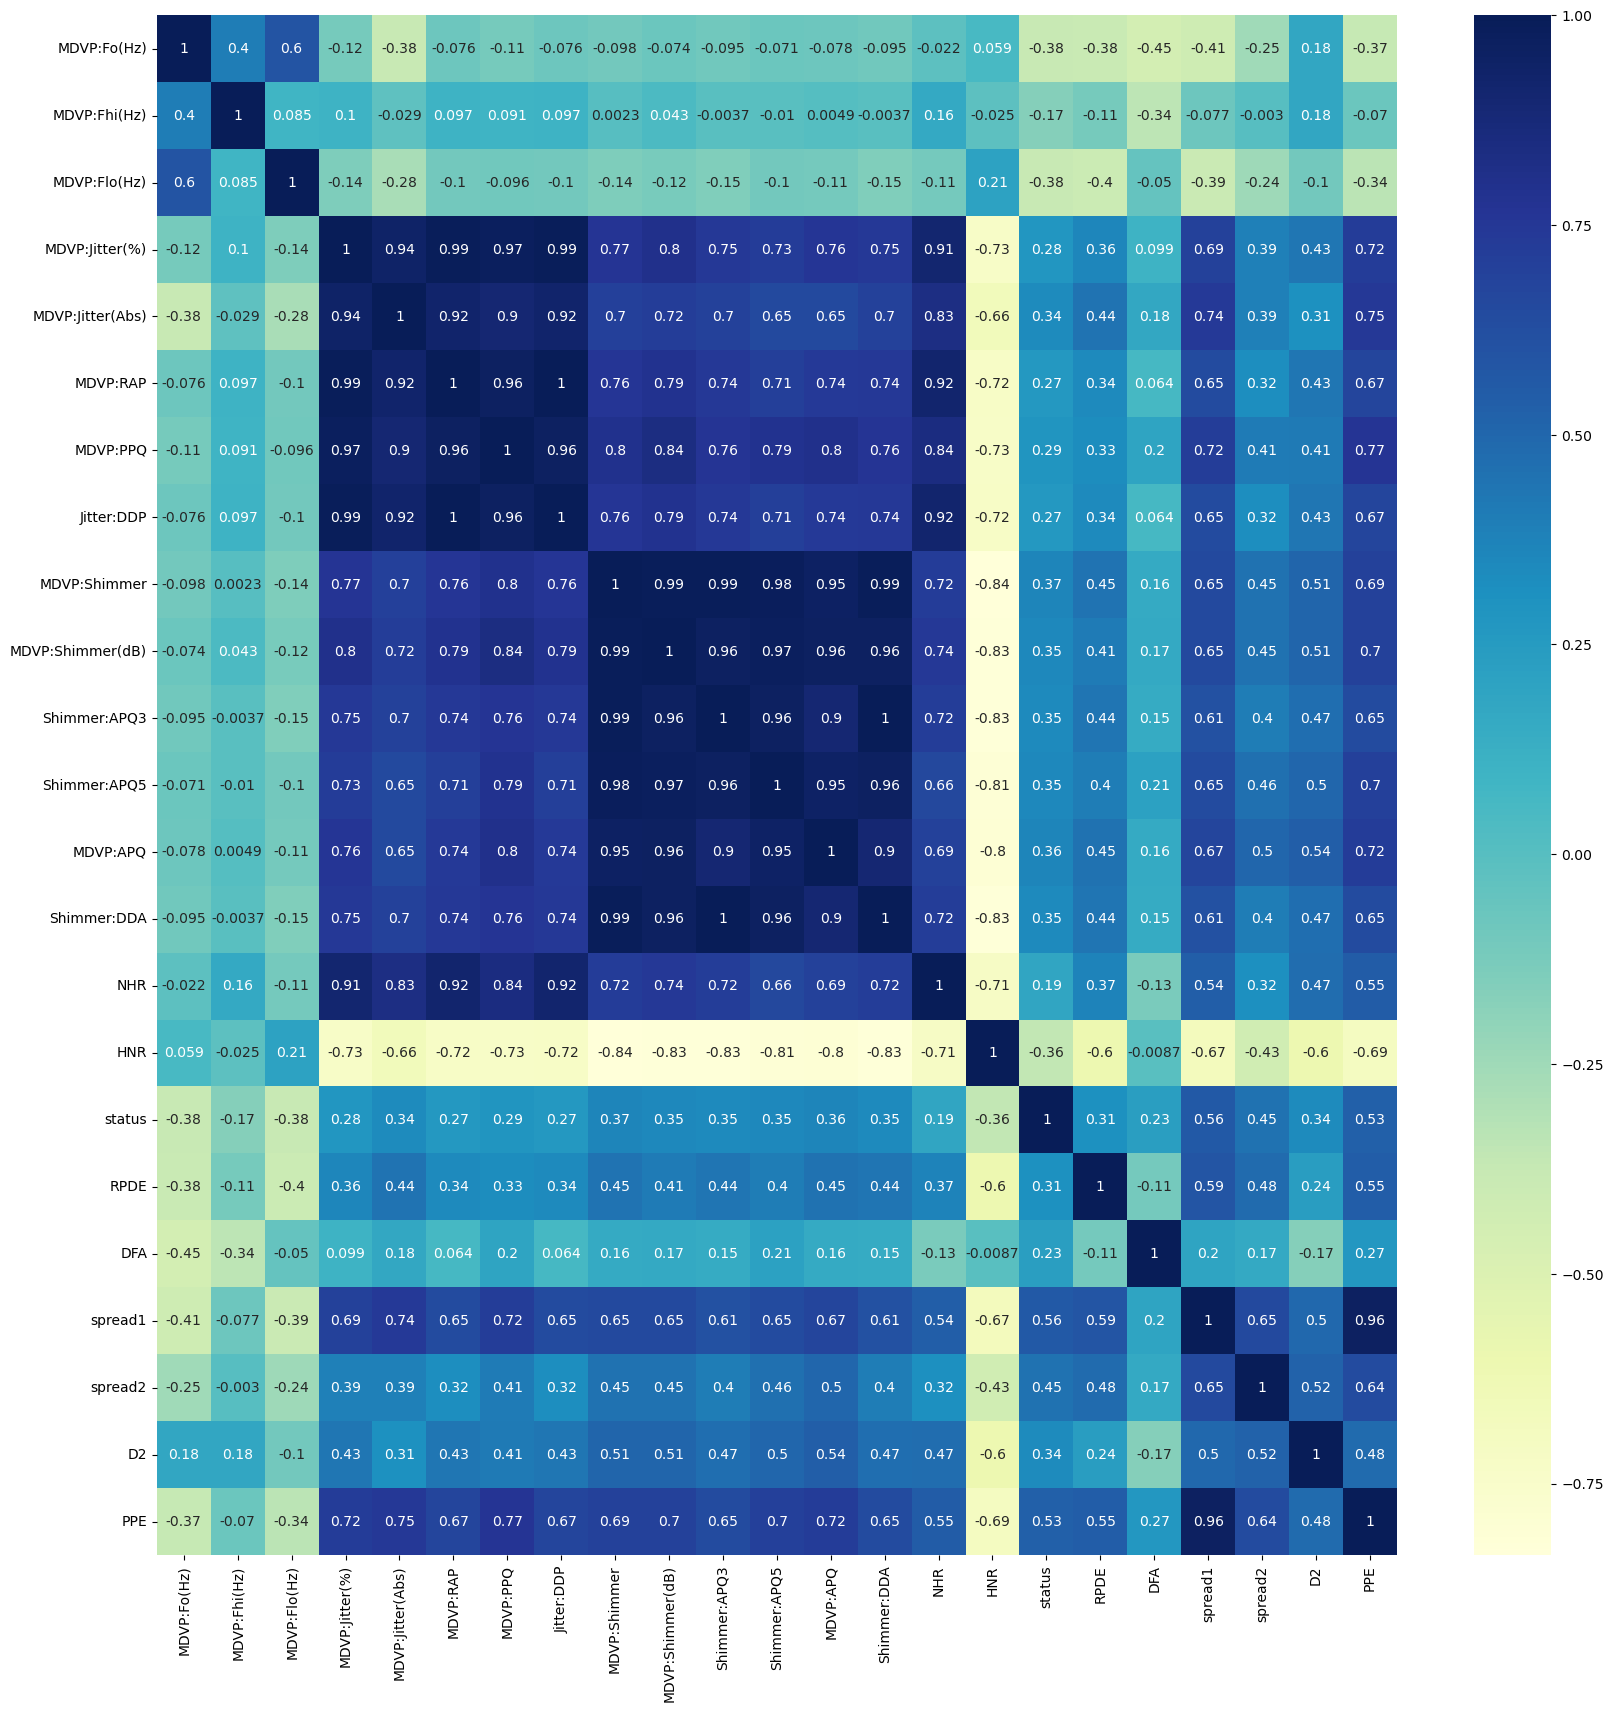

In [68]:
# Heatmap with status column
plt.figure(figsize=(20,20))
# plt.figure() is a funct of matplotlib that creates a new blank fig,avoid overlapping.
sns.heatmap(correl_with_status,annot=True,cmap='YlGnBu')
#annot=T writes the actual corr number in each box,cmap="OrRd"sets the color theme to Orange-Red
plt.show()
#plt.show() displays the plot on the screen

## Build a Model

In [70]:
# Split data
# 1. Stratified Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 
# Applied stratified so that model learns from all types of data(make sure that both train nd test have same perentage of each class)
# 2. Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# 3. Confirm final shapes
print("Final shapes:")
print("X_train_smote:", X_train_smote.shape)
print("Y_train_smote:", Y_train_smote.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Final shapes:
X_train_smote: (236, 22)
Y_train_smote: (236,)
X_test: (39, 22)
Y_test: (39,)


#### Original Data → Stratified Train-Test Split → Apply SMOTE to Training Data → Train Model → Test on Real Test Data

In [72]:
# Data Standardization (we need all the data in the same range)
scaler=StandardScaler()
X_train_smote=scaler.fit_transform(X_train_smote)
X_test=scaler.transform(X_test)

## Model Training
*   Logistic Regression 
*   Naive Bayes 
*   K-Nearest Neighbors (KNN) 
*   Random Forest 
*   Support Vector Mechanism 
*   XGBoost
*   Artificial Neural Network

### Logistic Regression

Training Accuracy: 0.8814
Testing Accuracy: 0.7949
Precision: 0.9565
Recall: 0.7586
F1 Score: 0.8462
AUC: 0.9241
Confusion Matrix:
 [[ 9  1]
 [ 7 22]]


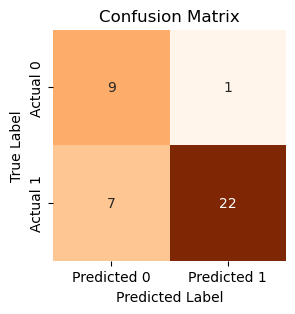

In [75]:
# Fit logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_smote, Y_train_smote)

# Prediction
logistic_pred = logistic_model.predict(X_test)               # The predict() function returns class labels for each test sample.
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]  #  This function gives the predicted probabilities for class 1.

# Model Evaluation
train_acc1 = accuracy_score(Y_train_smote, logistic_model.predict(X_train_smote))
test_acc1 = accuracy_score(Y_test, logistic_model.predict(X_test))
prec1 = precision_score(Y_test, logistic_pred)
rec1 = recall_score(Y_test, logistic_pred)
f1_1 = f1_score(Y_test, logistic_pred)
auc1 = roc_auc_score(Y_test, logistic_prob)

# Print results
print(f"Training Accuracy: {train_acc1:.4f}")
print(f"Testing Accuracy: {test_acc1:.4f}")
print(f"Precision: {prec1:.4f}")
print(f"Recall: {rec1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print(f"AUC: {auc1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, logistic_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, logistic_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes

Training Accuracy: 0.7881
Testing Accuracy: 0.6667
Precision: 0.9444
Recall: 0.5862
F1 Score: 0.7234
AUC: 0.8552
Confusion Matrix:
 [[ 9  1]
 [12 17]]


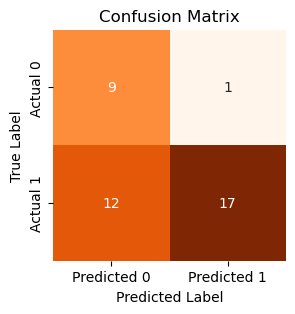

In [77]:
# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_smote, Y_train_smote)

# Predictions
nb_pred = nb_model.predict(X_test)
nb_prob = nb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
train_acc2 = accuracy_score(Y_train_smote, nb_model.predict(X_train_smote))
test_acc2 = accuracy_score(Y_test, nb_model.predict(X_test))
prec2 = precision_score(Y_test, nb_pred)
rec2 = recall_score(Y_test, nb_pred)
f1_2 = f1_score(Y_test, nb_pred)
auc2 = roc_auc_score(Y_test, nb_prob)

# Print results
print(f"Training Accuracy: {train_acc2:.4f}")
print(f"Testing Accuracy: {test_acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall: {rec2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print(f"AUC: {auc2:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, nb_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, nb_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### K-Nearest Neighbors (KNN)

Training Accuracy: 0.9534
Testing Accuracy: 0.8718
Precision: 1.0000
Recall: 0.8276
F1 Score: 0.9057
AUC: 0.9931
Confusion Matrix:
 [[10  0]
 [ 5 24]]


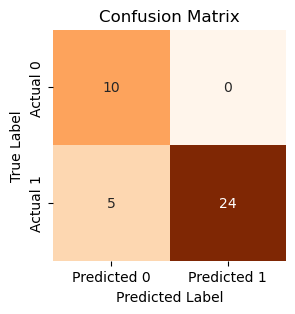

In [79]:
# Fit Knn Model
knn_model = KNeighborsClassifier(n_neighbors=5) # It finds the 5 nearest points calculates the distance from the test point to all training points
knn_model.fit(X_train_smote, Y_train_smote)

# Prediction
knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:, 1]

# Model Evaluation
train_acc3 = accuracy_score(Y_train_smote, knn_model.predict(X_train_smote))
test_acc3 = accuracy_score(Y_test, knn_model.predict(X_test))
prec3 = precision_score(Y_test, knn_pred)
rec3 = recall_score(Y_test, knn_pred)
f1_3 = f1_score(Y_test, knn_pred)
auc3 = roc_auc_score(Y_test, knn_prob)

# Print results
print(f"Training Accuracy: {train_acc3:.4f}")
print(f"Testing Accuracy: {test_acc3:.4f}")
print(f"Precision: {prec3:.4f}")
print(f"Recall: {rec3:.4f}")
print(f"F1 Score: {f1_3:.4f}")
print(f"AUC: {auc3:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, knn_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, knn_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Random Forest

Training Accuracy: 0.9746
Testing Accuracy: 0.8205
Precision: 0.9231
Recall: 0.8276
F1 Score: 0.8727
AUC: 0.9552
Confusion Matrix:
 [[ 8  2]
 [ 5 24]]


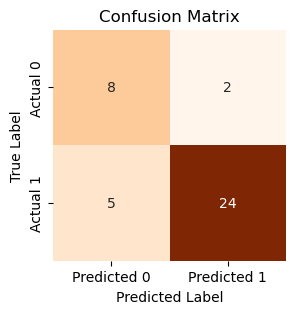

In [81]:
# Fit Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=50,          # fewer trees
    max_depth=5,              # restrict depth
    min_samples_split=10,     # split only when 10+ samples
    min_samples_leaf=5,       # leaf nodes must have 5+ samples
    max_features='sqrt',      # use sqrt of features at each split
    random_state=42)
rf_model.fit(X_train_smote, Y_train_smote)

# Prediction
rf_pred = rf_model.predict(X_test)                   # The predict() function returns class labels for each test sample
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Model Evaluation
train_acc4 = accuracy_score(Y_train_smote, rf_model.predict(X_train_smote))
test_acc4 = accuracy_score(Y_test, rf_model.predict(X_test))
prec4 = precision_score(Y_test, rf_pred)
rec4 = recall_score(Y_test, rf_pred)
f1_4 = f1_score(Y_test, rf_pred)
auc4 = roc_auc_score(Y_test, rf_prob)

# Print results
print(f"Training Accuracy: {train_acc4:.4f}")
print(f"Testing Accuracy: {test_acc4:.4f}")
print(f"Precision: {prec4:.4f}")
print(f"Recall: {rec4:.4f}")
print(f"F1 Score: {f1_4:.4f}")
print(f"AUC: {auc4:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, rf_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### 
|Parameter | Purpose |
|-|-|
| n_estimators=50	| Number of trees in the forest. Here, I am using 50 decision trees.|
| max_depth=5	    |Maximum depth of each tree. Limits how deep a tree can grow. This helps prevent overfitting by keeping trees simpler.|
| min_samples_split=10	| A node will only split if it has at least 10 samples. This stops the tree from creating very small, overfitted branches.|
| min_samples_leaf=5	| Each leaf node must have at least 5 samples. This prevents the model from making decisions based on very small data points   (helps generalization).|   
| max_features='sqrt'	|At each split, the tree considers only the square root of total features. This adds randomness and reduces correlation     |between trees, improving performance.|
| random_state=42	| Fixes the random seed so that results are reproducible every time you run the model.|

### Support Vector Mechanism

Training Accuracy: 0.8983
Testing Accuracy: 0.8205
Precision: 0.9583
Recall: 0.7931
F1 Score: 0.8679
AUC: 0.8793
Confusion Matrix:
 [[ 9  1]
 [ 6 23]]


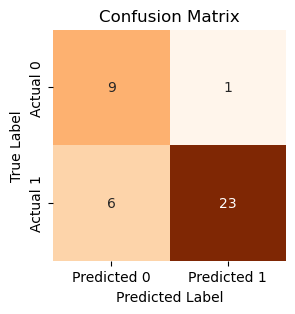

In [84]:
# Fit SVM Model
svm_model = svm.SVC(kernel='linear',probability = True) # SVM does not provide probabilities by default, therefore using probability = True
svm_model.fit(X_train_smote, Y_train_smote)

# Prediction
svm_pred = svm_model.predict(X_test)
svm_prob = svm_model.predict_proba(X_test)[:, 1]

# Model Evaluation
train_acc5 = accuracy_score(Y_train_smote, svm_model.predict(X_train_smote))
test_acc5 = accuracy_score(Y_test, svm_model.predict(X_test))
prec5 = precision_score(Y_test, svm_pred)
rec5 = recall_score(Y_test, svm_pred)
f1_5 = f1_score(Y_test, svm_pred)
auc5 = roc_auc_score(Y_test, svm_prob)

# Print results
print(f"Training Accuracy: {train_acc5:.4f}")
print(f"Testing Accuracy: {test_acc5:.4f}")
print(f"Precision: {prec5:.4f}")
print(f"Recall: {rec5:.4f}")
print(f"F1 Score: {f1_5:.4f}")
print(f"AUC: {auc5:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, svm_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, svm_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### XGBoost Classifier

Training Accuracy: 0.9915
Testing Accuracy: 0.8718
Precision: 0.9286
Recall: 0.8966
F1 Score: 0.9123
AUC: 0.9621
Confusion Matrix:
 [[ 8  2]
 [ 3 26]]


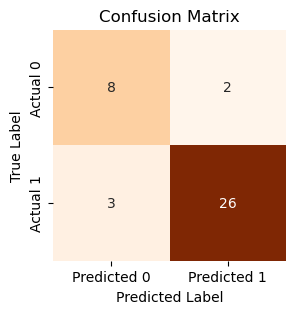

In [86]:
# Fit XGBoost Model
xgb_model = XGBClassifier(
    max_depth=4,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7,
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)
xgb_model.fit(X_train_smote, Y_train_smote)

# Prediction
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
train_acc6 = accuracy_score(Y_train_smote, xgb_model.predict(X_train_smote))
test_acc6 = accuracy_score(Y_test, xgb_model.predict(X_test))
prec6 = precision_score(Y_test, xgb_pred)
rec6 = recall_score(Y_test, xgb_pred)
f1_6 = f1_score(Y_test, xgb_pred)
auc6 = roc_auc_score(Y_test, xgb_prob)

# Print results
print(f"Training Accuracy: {train_acc6:.4f}")
print(f"Testing Accuracy: {test_acc6:.4f}")
print(f"Precision: {prec6:.4f}")
print(f"Recall: {rec6:.4f}")
print(f"F1 Score: {f1_6:.4f}")
print(f"AUC: {auc6:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, xgb_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, xgb_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Problem: Overfitting
The training accuracy of my XGBoost model came out to be 1.0, which initially indicated overfitting.To address the overfittting risk, I implemented regularization techniques given below..
Overfitting happens when a model learns the training data—including its noise—too well, resulting in poor generalization to unseen data.

| Parameter | Purpose |
|-|-|
|max_depth=4	|Trees can go only 4 levels deep (limits model complexity, avoids overfitting).|
|min_child_weight=3	|A split happens only if the branch has at least "weight" 3 (avoids small, useless splits).|
|subsample=0.7	|Each tree sees only 70% of the training data (adds randomness and prevents overfitting).|
|colsample_bytree=0.7	|Each tree uses only 70% of the features (adds variety to trees).|
|n_estimators=100	|Builds 100 trees one by one (each trying to correct the last one’s errors).|
|learning_rate=0.05	|Learns slowly and carefully (smaller steps = better generalization).|
|random_state=42	|Makes sure you get the same results every time (sets the seed for randomness).|


### ANN Model

In [89]:
# Set all seeds directly to 42 
os.environ['PYTHONHASHSEED'] = '42'          # Sets the seed for the NumPy random number generator.
os.environ['TF_DETERMINISTIC_OPS'] = '1'     # Want to ensure that small changes in the code do not introduce inconsistencies. 
np.random.seed(42)                         
random.seed(42)                            
tf.random.set_seed(42)                       # Sets the seed for TensorFlow’s random number generation.

# Model Definition
ann_model = Sequential([                     # This defines the Sequential model in Keras
    Input(shape=(X_train_smote.shape[1],)),  # The input layer is defined

    Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense64'),   
# relu activation bcuz It is used in hidden layers and outputs the input directly if it’s positive, otherwise, it outputs zero.
# A kernel regularizer is a technique used in neural networks to control the complexity of the model by penalizing large weights during training.
# kernel is basically the weight b/w the neurons    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense64_2'), # This is a fully connected layer with 64 neurons.
# Dense layers: These are the fully connected layers in the network(64 neurons), meaning each neuron in the layer is connected to every neuron in the previous layer.
    Dropout(0.4), 
#  A technique used to prevent overfitting. The value 0.4 means 40% of the neurons will be randomly dropped out during training.
    Dense(32, activation='relu', kernel_regularizer=l2(0.001), name='dense32'),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001), name='dense32_2'),
    Dropout(0.4), 

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  

    Dense(1, activation='sigmoid', name='dense_final')
# 1 is used to output the probability of class 1 (the presence of Parkinson’s disease).
# Sigmoid function is used in final layer and gives output between 0 and 1.It is used for binary classification.
], name='parkinsons_detector')

# Compile
ann_model.compile(
    optimizer=Adam(learning_rate=0.0008), # learning_rate How big each update step is.A smaller value like 0.0008 means slower but more stable training.
    loss='binary_crossentropy',           # it's a binary classification problem
    metrics=['accuracy']
)

# Early Stopping
early_stop = EarlyStopping(      
    monitor='val_loss',          # We monitor the validation loss during training.
    patience=8,                  # If the validation loss doesn't improve for 8 consecutive epochs, training will stop.
    restore_best_weights=True,   # The model’s weights will be restored to the best weights from the epoch with the lowest validation loss.
    verbose=1                    # This will print a message when early stopping is triggered.
)
print(ann_model.summary())       # To print out the architecture of the model and the number of parameters in each layer.

Model: "parkinsons_detector"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense64 (Dense)                      │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense64_2 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense32 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense32_2 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_final (Dense)                  │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,313 (36.38 KB)

 Trainable params: 9,313 (36.38 KB)

 Non-trainable params: 0 (0.00 B)

None


### Common Types of Kernel Regularizers
|Type|	Code|	Effect|
|-|-|-|
|L1	|kernel_regularizer=l1(0.001)	|Makes some weights exactly zero → sparse model|
|L2	|kernel_regularizer=l2(0.001)	|Makes all weights small → smooth & stable.|
|L1 + L2|	kernel_regularizer=l1_l2(l1=0.001, l2=0.001)|	Combines both effects.|

In [91]:
# Train
history = ann_model.fit(
    X_train_smote, Y_train_smote,
    validation_split=0.2,
    epochs=100,                  # The model will be trained for 100 iterations (epochs) over the entire dataset.
    batch_size=16,               # The dataset will be split into batches of 16 samples for each update during training.
    callbacks=[early_stop],      # the training will stop early if the model's performance does not improve (typically in terms of validation loss)
    verbose=0
)

Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 38.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training Accuracy: 0.9915
Testing Accuracy: 0.9744
Precision: 1.0000
Recall: 0.9655
F1 Score: 0.9825
AUC: 0.9931
Confusion Matrix:
 [[10  0]
 [ 1 28]]


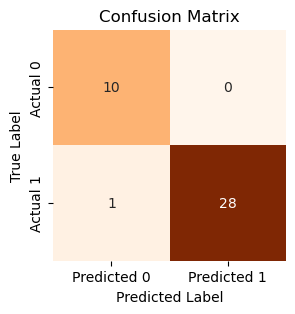

In [92]:
# Evaluation
## To convert the probability (continuous output) into a discrete class label (either 0 or 1)
## The output layer of a binary classifier (ANN) usually uses the sigmoid activation function. This function outputs a value between 0 and 1, 
## which represents the probability that the input belongs to the positive class (usually class "1").
threshold = 0.5

# Predictions
ann_prob = ann_model.predict(X_test).flatten()
ann_pred = (ann_prob > threshold).astype(int)

# Train Predictions
train_prob = ann_model.predict(X_train_smote).flatten()
train_pred = (train_prob > threshold).astype(int)

# Metrics
train_acc7 = accuracy_score(Y_train_smote, train_pred)
test_acc7 = accuracy_score(Y_test, ann_pred)
prec7 = precision_score(Y_test, ann_pred)
rec7 = recall_score(Y_test, ann_pred)
f1_7 = f1_score(Y_test, ann_pred)
auc7 = roc_auc_score(Y_test, ann_prob)

# Print results
print(f"Training Accuracy: {train_acc7:.4f}")
print(f"Testing Accuracy: {test_acc7:.4f}")
print(f"Precision: {prec7:.4f}")
print(f"Recall: {rec7:.4f}")
print(f"F1 Score: {f1_7:.4f}")
print(f"AUC: {auc7:.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, ann_pred))

# Confusion Matrix Plot
cm = confusion_matrix(Y_test, ann_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,   
# annot = True display the actual numeric values inside the heatmap cells, fmt means format for annot and 'd' is for integer, cbar : color intensity 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

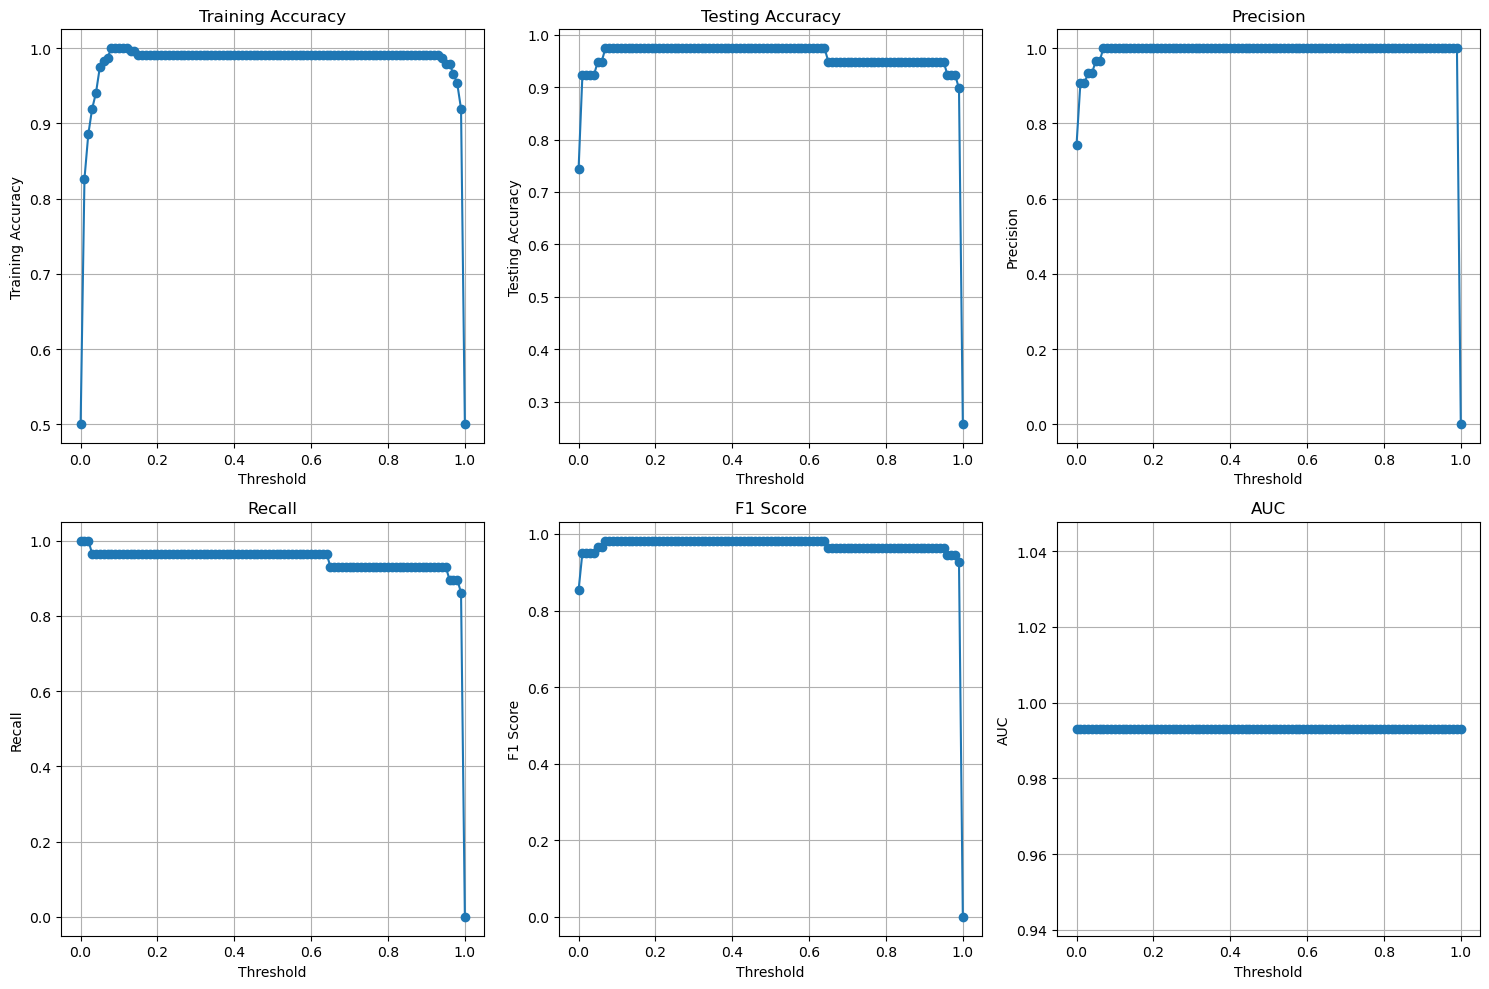

Model: "parkinsons_detector"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense64 (Dense)                      │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense64_2 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense32 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense32_2 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_final (Dense)                  │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,941 (109.15 KB)

 Trainable params: 9,313 (36.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,628 (72.77 KB)

None


In [93]:
# Threshold Analysis
thresholds = np.arange(0, 1.01, 0.01)  # The threshold value in this code ranges from 0 to 1.
# np.arange() will exclude the endpoint, so it actually generates values up to 1.00.

# Initialize metrics dictionary
# Creates a dictionary called metrics to store the evaluation results for different classification metrics across different thresholds.
metrics = {
    'Training Accuracy': [],
    'Testing Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

for threshold in thresholds:
    train_pred = (train_prob > threshold).astype(int)
    test_pred = (ann_prob > threshold).astype(int)

    
# Calculates metric for each threshold
    metrics['Training Accuracy'].append(accuracy_score(Y_train_smote, train_pred))
    metrics['Testing Accuracy'].append(accuracy_score(Y_test, test_pred))
    metrics['Precision'].append(precision_score(Y_test, test_pred, zero_division=0))
    metrics['Recall'].append(recall_score(Y_test, test_pred, zero_division=0))
    metrics['F1 Score'].append(f1_score(Y_test, test_pred, zero_division=0))
    metrics['AUC'].append(roc_auc_score(Y_test, ann_prob))  # AUC is threshold-independent

# Creating data frame
metrics_df = pd.DataFrame(metrics, index=thresholds)

# 10. Plot Metrics vs Threshold
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_df.columns):
    axes[i].plot(metrics_df.index, metrics_df[metric], marker='o', linestyle='-')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

print(ann_model.summary())

## ROC Curves for all Models

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


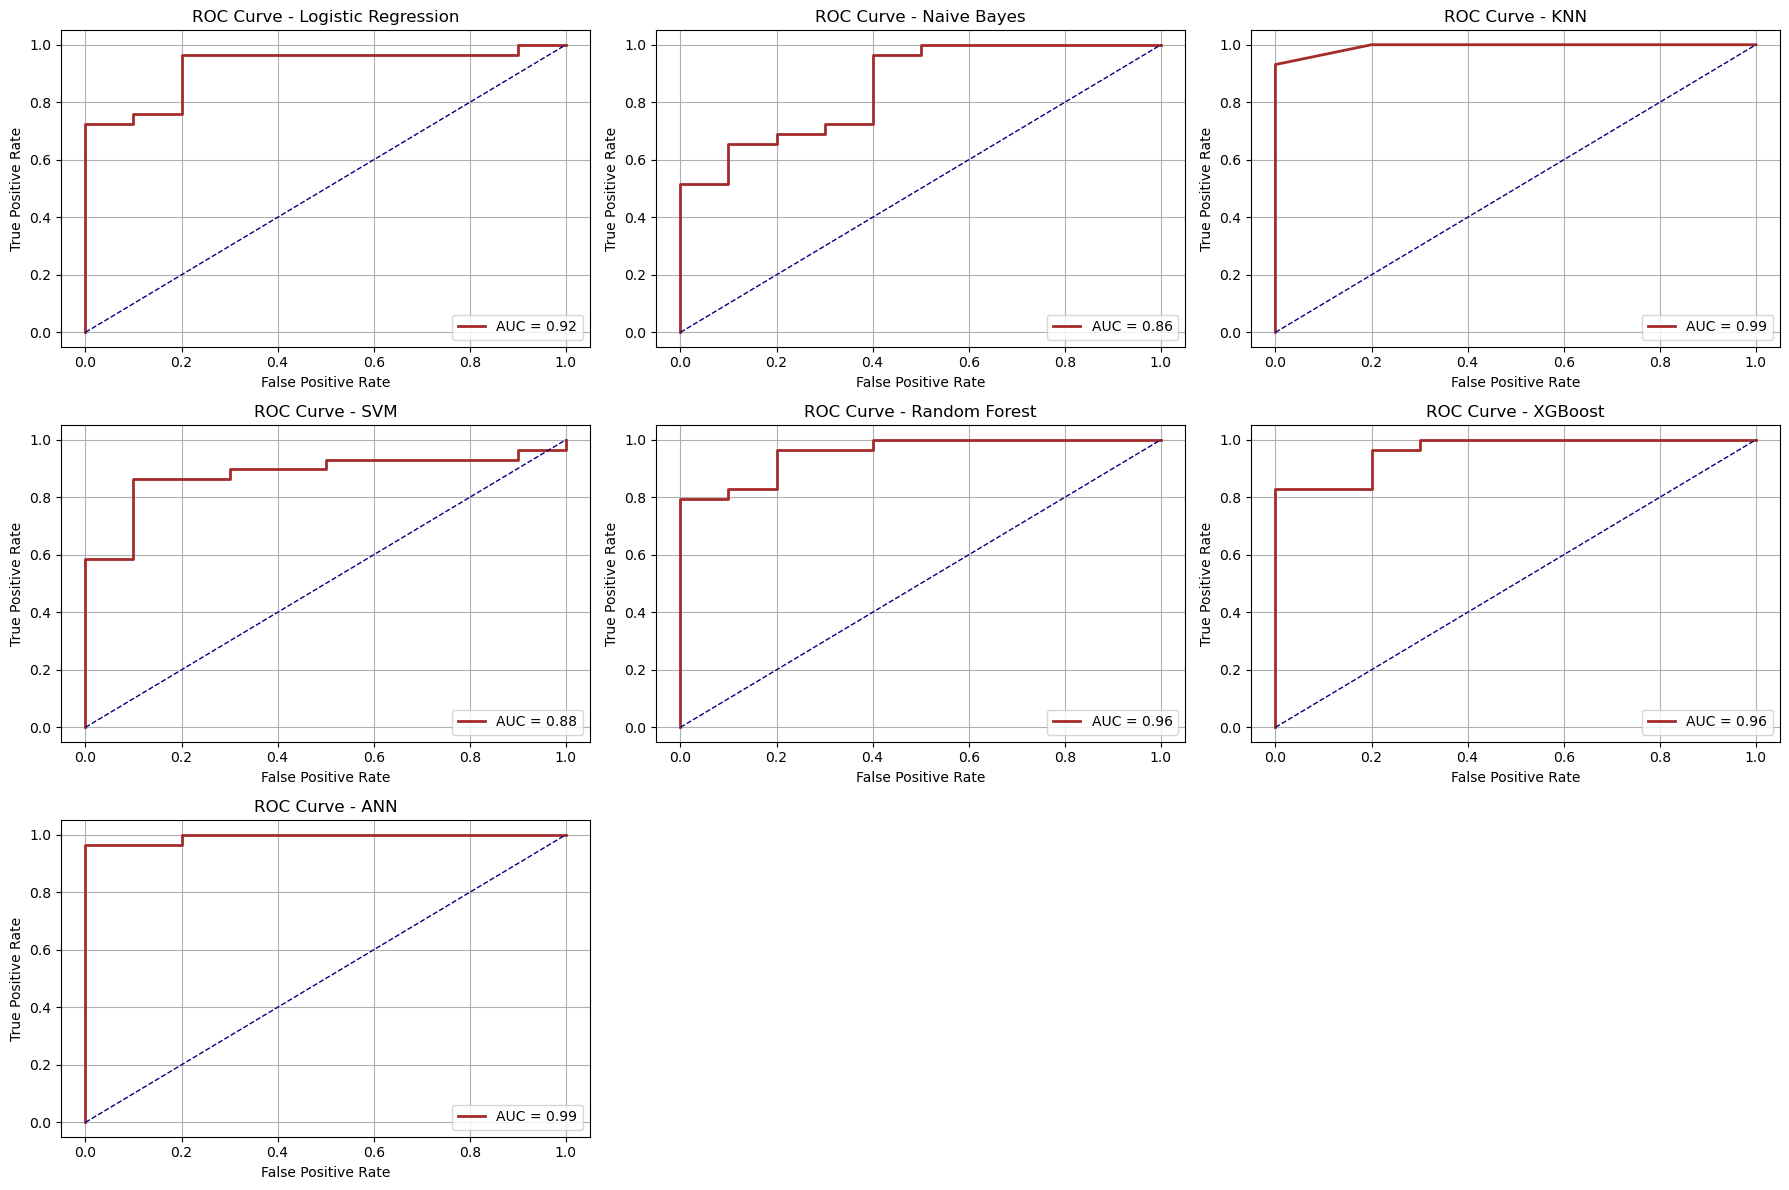

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List of models and their names (make sure variable names match yours)
models = [
    ("Logistic Regression", logistic_model.predict_proba(X_test)[:, 1]),
    ("Naive Bayes", nb_model.predict_proba(X_test)[:, 1]),
    ("KNN", knn_model.predict_proba(X_test)[:, 1]),
    ("SVM", svm_model.predict_proba(X_test)[:, 1]),
    ("Random Forest", rf_model.predict_proba(X_test)[:, 1]),
    ("XGBoost", xgb_model.predict_proba(X_test)[:, 1]),
    ("ANN", ann_model.predict(X_test).ravel())  # ANN gives raw output
]

# Plot settings
plt.figure(figsize=(18, 12))
for i, (name, probs) in enumerate(models, 1):
    fpr, tpr, _ = roc_curve(Y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(3, 3, i)
    plt.plot(fpr, tpr, color='brown', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.grid()

plt.tight_layout()
plt.show()


                        Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression     0.794872   0.956522  0.758621  0.846154  0.829310
Naive Bayes             0.666667   0.944444  0.586207  0.723404  0.743103
KNN                     0.871795   1.000000  0.827586  0.905660  0.913793
Random Forest           0.820513   0.923077  0.827586  0.872727  0.813793
Support Vector Machine  0.820513   0.958333  0.793103  0.867925  0.846552
XGBoost                 0.871795   0.928571  0.896552  0.912281  0.848276
ANN                     0.974359   1.000000  0.965517  0.982456  0.982759






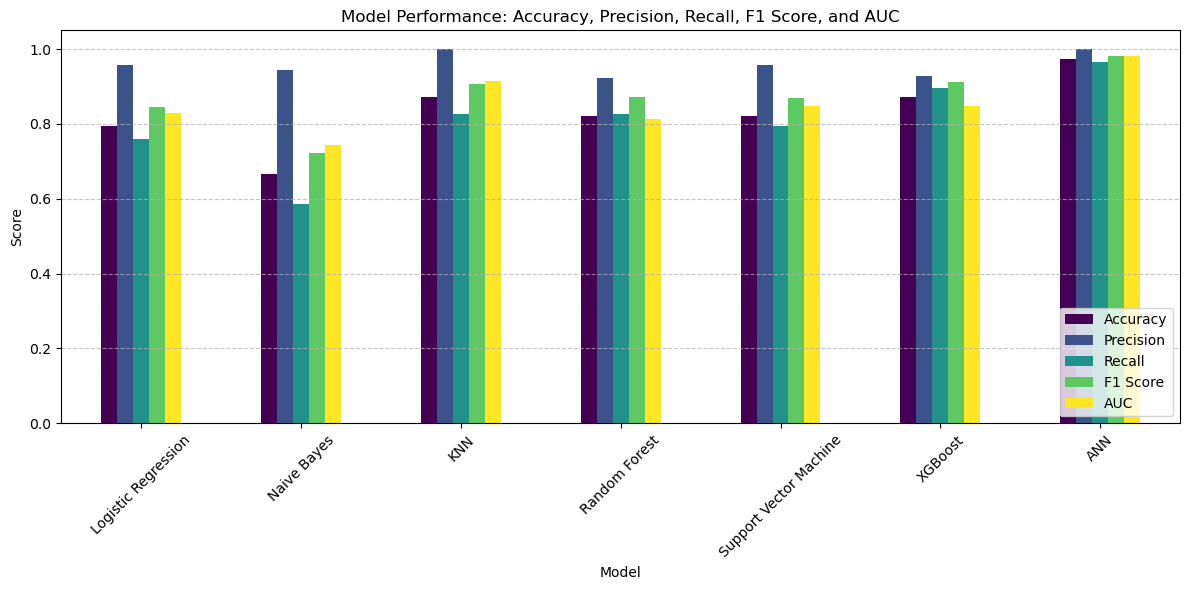

In [96]:
# Creating the comparison DataFrame with predictions
comparison = pd.DataFrame({"Actual": Y_test,"Logistic Regression": logistic_pred,"Naive Bayes": nb_pred,"KNN": knn_pred,"Random Forest": rf_pred,"Support Vector Machine": svm_pred,"XGBoost": xgb_pred,"ANN": ann_pred})


# Function to calculate and return all metrics
def calculate_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc = roc_auc_score(actual, predicted)
    return accuracy, precision, recall, f1, auc


# Define model names (must match column names in comparison DataFrame)
models = ["Logistic Regression", "Naive Bayes", "KNN", "Random Forest", "Support Vector Machine","XGBoost","ANN"]

# Store metrics in a dictionary
metrics = {model: calculate_metrics(comparison["Actual"], comparison[model]) for model in models}

# Create DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).T
print(metrics_df)
print("\n\n\n")
# Plot the metrics as a grouped bar chart
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance: Accuracy, Precision, Recall, F1 Score, and AUC")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### Building a Predictive System

In [98]:
input_data = (173.917,192.735,86.18,0.00476,0.00003,0.00221,0.00258,0.00663,0.04192,0.364,0.02187,0.0247,0.03772,0.06562,0.0184,20.422,0.537264,0.686894,-5.248776,0.210279,2.547508,0.253556)

# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = svm_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinsons Disease")
else:
    print("The Person has Parkinsons")

[1]
The Person has Parkinsons
